### Contour Techniques

**Contour:**
* Contour are defined as a curve joining all continuous point(along the boundary) having same color or intensity.
* Contour are the useful tool for 
    * Shape detection
    * Object detection
    * Recognition
    
**Application:**
* Motion detection
* Unattended object detection
* Background and foreground segmentation


### Find and Draw contour

* In openCV,the methods available make it really easy to find and draw contours on the image.

**Function:**
* cv2.findContours()
* cv2.drawContours()

*Algorithms for contour detection:*
* cv2.CHAIN_APPROX_SIMPLE
* cv2.CHAIN_APPROX_NONE

### Steps in detection and drawing the contours in opencv
*Steps:*
* Read the image and convert RBG to GRAY image.
* Apply the binary thresholding or canny edge.
* Find contour.
    * use tge findContours() function to detect the contour of the image.
    * Three arguments
        * image
        * mode
        * method
* Draw contour.
    * once contour identified
    * use drawcontours() function to overlay the contours on the original RGB image.
    * Argument
        * Image
        * Contours
        * contourIdx
        * Color
        * thickness

In [ ]:
# importing cv2 module
import cv2
img = cv2.imread("Thumbs_up_down.jpg")
img=cv2.resize(img,(600,600))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh=cv2.threshold(gray,200,225,cv2.THRESH_BINARY_INV)
cv2.imshow("Gray image",gray)
cv2.imshow("binary_image",thresh)
hierarchy,contours=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("no.of contours : "+str(len(contours)))
cv2.drawContours(img,hierarchy,-1,(0,255,0),2)
# -1:for drawing all the contours
# if we give 1 it draws the first contour
# (0,255,0) : for drawing green contour since it is bgr channel
# 2 : for thickness of the contour
cv2.imshow("contour detection",img)

# waiting using waitKey method
cv2.waitKey(0)
cv2.detsroyAllWindows()

no.of contours : 1


### Image Segmentation

* It is the process of partitioning an image into multiple different region or segmentation.
* Image segmenatation to separate objects and analyze each object individually to check what it is.
* Image segmentation usually serves as the preprocessing before pattern recognition, feature extraction, compression of the image.

**Uses:**
    *Image segmentation is used to anlayze and find inside image.*

### Image Segmentation Using k-means clustering

**K-means:**
* K-means is a clustering algorithm, it is unsupervised machine learning which means that there is no labelled data available.
* It is used to identify different classes and clusters in the given data based on how similar the data is.

*The k-means clustering algorithm mainly performs two tasks:*
* Determines the best value for k-center points or centroids by an iterative process.
* Assign each data point to its closest k-center.Those data points which are near to the particular k-center,create a cluster.

*Working of the Algorithm:*
* Step1: Select the number k to decide the no.of clusters.
* Step2: Select random k pionts or centroids.
* Step3: Assign each data point to closest centroid, which will form the predefined k clusters.
* Step4: Calculate the variance and place a new centroid of each cluster.
* Step5: Repeat the third steps, which means reassign each data point to the new closest centroid of each cluster.
* Step6: If any reassignment occurs, then go to step 4 else go to Final step.
* Step7: The model is ready

**K-means Clustering in OpenCV** 

**Input Parameters:**

*Samples:* It should be of np.float32 datatype, and each feature should be put in a single column.

*nclusters(k):* Number of clusters required at end.

**Criteria:** It is the iteration termination criteria.Whwn the criteria is satisfied, algorithm iteration stops.Actually,it should be a tuple of 3 parameters.

* They are (type,max_iter,epsilon)

*Type of termination Criteria:*

It has 3 flags below:

**cv.TERM_CRITERIA_EPS** - Stop the algorithm iteration if specified accuracy,epsilon,is reached.

**cv.TERM_CRITERIA_MAX_ITER** - Stop the algorithm after the specified no.of iterations, max_iter.

**cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER** - Stop the iteration when any of the above condition is met.

* *max_iter* - An integer specifying maximum no.of iterations.
* *epsilon* - Required accuracy.
* *attempts* - Flag to specify the number of times the algorithm is executed using different initial labelling.The algorithm returns the labels that yield the best compactness.This compactness is returned as output.
* *flags* - This flag is used to specify how initial centers are taken.Normally two flags are used for this: 
    * cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS


**Output Parameters:**
* Compactness : It is the sum of squared distance from each point to their corresponding centers.
* labels : This is the label array where each element marked '0','1'....
* centers : This is array of centers of clusters.

### Applying Image Segmentation on Colored Image

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Matrix of Original Image
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Shape of Original Image
(1200, 1920, 3)
After Reshaping : 
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(2304000, 3)
labels array [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
After flattening labels array [1 1 1 ... 1 1 1]


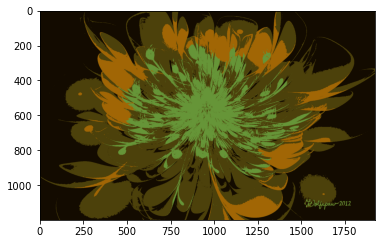

-1

In [30]:
image = cv2.imread("PeacockFeather-1.jpg")
#RgbImage = cv2.cvtcolor(image,cv2.COLOR_BGR2RGB)
print("Matrix of Original Image")
print(image)
print("Shape of Original Image")
print(image.shape)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values=image.reshape((-1,3))
print("After Reshaping : ")
print(pixel_values)

pixel_values=np.float32(pixel_values)
print(pixel_values.shape)

#define stopping criteria
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)

#define number of clusters
k=4
_,labels,(centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) #attempts=10 here

print("labels array",labels)

#convert back to 8 bit values
centers=np.uint(centers)

#flatten the labels array
labels=labels.flatten()

print("After flattening labels array",labels)

#convert all pixels into the color of the centroids
segmented_image=centers[labels]

#reshape back to original image dimension
segmented_image=segmented_image.reshape(image.shape)

#show the image
plt.imshow(segmented_image)
plt.show()
  
# waiting using waitKey method
cv2.waitKey(0)

### Applying Image Segmentation on Gray Image

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1200, 1920)
[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(768000, 3)


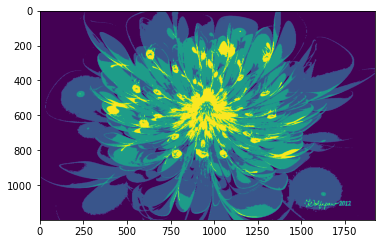

-1

In [26]:
image = cv2.imread("PeacockFeather-1.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
print(image)
print(image.shape)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values=image.reshape((-1,3))
print(pixel_values)

pixel_values=np.float32(pixel_values)
print(pixel_values.shape)

#define stopping criteria
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)

#define number of clusters
k=4
_,labels,(centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS) #attempts=10 here

#convert back to 8 bit values
centers=np.uint(centers)

#flatten the labels array
labels=labels.flatten()

#convert all pixels into the color of the centroids
segmented_image=centers[labels.flatten()]

#reshape back to original image dimension
segmented_image=segmented_image.reshape(image.shape)

#show the image
plt.imshow(segmented_image)
plt.show()
  
# waiting using waitKey method
cv2.waitKey(0)

### Image Masking In OpenCV

**Image Masking:**
* Masking is the technique used to highlight a specific object from the image.
* It can be defined a setting certain pixel of an image to same null value such as 0.
* A mask allow us to focus only on portions of the image that interests us.

**Bitwise Operator:**
* Bitwise operations help to image masking.
* This feature of opencv allow us to filter out the part of the image thai is relevant to us.

*Types:*

* bitwise_and
* bitwise_or
* bitwise_xor
* bitwise_not

In [12]:
import cv2
import numpy as np
rectangle=np.zeros((300,300),dtype='uint8')
cv2.rectangle(rectangle,(25,25),(275,275),255,-1) 
# (25,25) - start region
# (275,275) - end region
# 255 - color white
# -1 - solid
cv2.imshow("Rectangle",rectangle)

cv2.waitKey(0)

-1

In [13]:
import cv2
import numpy as np
circle=np.zeros((300,300),dtype='uint8')
cv2.circle(circle,(150,150),140,255,-1) 
# (150,150) - start region
# 140 - diameter
# 255 - color white
# -1 - solid
cv2.imshow("Circle",circle)

cv2.waitKey(0)

-1

In [14]:
bitwise_and=cv2.bitwise_and(rectangle,circle)
cv2.imshow("and",bitwise_and)

In [2]:
import cv2
import numpy as np
rectangle=np.zeros((300,300),dtype='uint8')
cv2.rectangle(rectangle,(25,25),(275,275),255,-1) 
# (25,25) - start region
# (275,275) - end region
# 255 - color white
# -1 - solid
circle=np.zeros((300,300),dtype='uint8')
cv2.circle(circle,(150,150),140,255,-1) 
# (150,150) - start region
# 140 - diameter
# 255 - color white
# -1 - solid and 1 - for outline
bitwise_and=cv2.bitwise_and(rectangle,circle)
cv2.imshow("and",bitwise_and)
cv2.waitKey(0)

-1

In [3]:
import cv2
import numpy as np
rectangle=np.zeros((300,300),dtype='uint8')
cv2.rectangle(rectangle,(25,25),(275,275),255,-1) 
circle=np.zeros((300,300),dtype='uint8')
cv2.circle(circle,(150,150),140,255,-1) 
bitwise_or=cv2.bitwise_or(rectangle,circle)
cv2.imshow("or",bitwise_or)
cv2.waitKey(0)

-1

In [4]:
import cv2
import numpy as np
rectangle=np.zeros((300,300),dtype='uint8')
cv2.rectangle(rectangle,(25,25),(275,275),255,-1) 
circle=np.zeros((300,300),dtype='uint8')
cv2.circle(circle,(150,150),140,255,-1) 
bitwise_xor=cv2.bitwise_xor(rectangle,circle)
cv2.imshow("xor",bitwise_xor)
cv2.waitKey(0)

-1

**Process of Masking:**

*Three steps:*

* Create a black canvas with the same dimension as a image.
* Changing the values of the mask by drawing any figure in the image and providing it with a white color.
* Performing the bitwise ADD operation on the image with the mask.

In [10]:
import cv2
import numpy as np
img=cv2.imread("PeacockFeather-1.jpg")
img=cv2.resize(img,(500,500))
cv2.imshow("Original image",img)

mask1=np.zeros(img.shape[:2],dtype='uint8')
cv2.rectangle(mask1,(100,100),(400,400),255,-1)
masked_img=cv2.bitwise_and(img,img,mask=mask1)
cv2.imshow("masked image",masked_img)
cv2.waitKey(0)

-1

In [15]:
import cv2
import numpy as np
img=cv2.imread("PeacockFeather-1.jpg")
img=cv2.resize(img,(500,500))
cv2.imshow("Original image",img)

mask2=np.zeros(img.shape[:2],dtype='uint8')
cv2.circle(mask2,(150,300),100,255,-1)
masked_img=cv2.bitwise_and(img,img,mask=mask2)
cv2.imshow("masked image",masked_img)
cv2.waitKey(0)

-1

### Thresholding

* Threshold is used to binarize the image based on the pixel intensities.
* Threshold Is simplest kind of the image segmentation because it help to partition the image into two group of pixel-white for foreground and black for background.
* In simple threshold manually specify the threshold value, for good threshold.
* In otsu threshold automatic determine the threshold.

### otsu thresholding
* This method is used to automatically find the optimal threshold intensity.
* A value of the threshold isn't not chosen but is determined automatically.

**Concept of otsu:**

*Automatic global thresholding algorithm:*
* Process the input
* Obtain histogram
* Compute the Threshold value T
* Replace image pixels into white in those regions, where saturation is greater than T and into the black in the opposite.

* Otsu method is applied to the image which are bimodal which means the image is having two peaks in the histogram.

**Explanation**

* Otsu's thresholding method involves iterating through all the possible threshold values and calculating a measure of spread for the pixel levels each side of the threshold, i.e. the pixels that either fall in foreground or background.

* The aim is to find the threshold value where the sum of foreground and background spreads is at its minimum.

**function:**
cv2.threshold(image,120,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [ ]:
import cv2
import numpy as np
img=cv2.imread("PeacockFeather-1.jpg")
img=cv2.resize(img,(500,500))
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,thresh1=cv2.threshold(img,120,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_,thresh2=cv2.threshold(img,120,255,cv2.THRESH_BINARY)

cv2.imshow("image",img)
cv2.imshow("OTSU image",thresh1)
cv2.imshow("Binary threshold image",thresh2)
cv2.waitKey(0)